In [54]:
# Import libraries
import sklearn
import sklearn.datasets
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [55]:
# Import wines dataset and target
df = sklearn.datasets.load_wine(as_frame=True).data
df['target'] = sklearn.datasets.load_wine(as_frame=True).target

In [56]:
# Check contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [57]:
# Check coverage and descriptive stats
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [74]:
df_means = df.groupby('target').mean()

In [77]:
df_means

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


<BarContainer object of 3 artists>

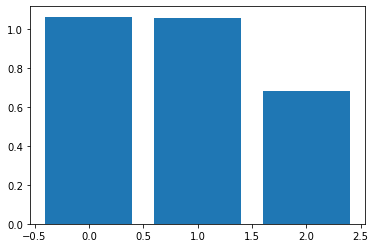

In [76]:
plt.bar(df_means.index, df_means['hue'])

In [59]:
# Check distribution of target
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [61]:
# Initialize standard scaler 
scaler = StandardScaler()

In [62]:
# Fit transform on df 
df2 = pd.DataFrame(scaler.fit_transform(df.drop('target', axis=1)))
df2['target'] = df['target']

In [64]:
# Initialize model 
knn = KNeighborsClassifier(n_neighbors=10)

In [65]:
# Fit model 
knn.fit(df2.drop('target', axis=1), y=df2['target'])

KNeighborsClassifier(n_neighbors=10)

In [66]:
# Predict using model 
df2['predictions'] = knn.predict(df2.drop(['target'], axis=1))

In [67]:
print('Accuracy:', accuracy_score(y_true = df2['target'], y_pred=df2['predictions']))

Accuracy: 0.9775280898876404


In [68]:
print(classification_report(y_true=df2['target'], y_pred = df2['predictions']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.94      0.97        71
           2       0.98      1.00      0.99        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178

